In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
runpath = '/Users/spartee/Dropbox/Professional/Cray/399-Thesis/3yr_runs_with_tracer/1-2_deg_1000/'
data = xr.open_dataset(runpath + 'ocean_mean_month.nc',decode_times=False)
# Define list of 3d variables (nz,nlat,nlon) to be used to construct tensor
state_vars_3d = ['dye001',
                 'dye002',
                 'dye003',
                 'sfn']
nvar_3d = len(state_vars_3d)
# Placeholder list for 2d variables (nlat,nlon)
state_vars_2d = []
nvar_2d = len(state_vars_2d)
# Store dimension lengths of data
nk = len(data.zl)
nlat = data.yh.size
nlon = data.xh.size
npts = nlat*nlon
# Define indices for time averaging
t0 = 12
tf = -1

In [4]:
# Calculate zonal streamfunction
data['sfn'] = data.vh.cumsum('xh')

In [13]:
# Create array which will become the state tensor
state_tensor = np.zeros((npts,nvar_3d*nk+nvar_2d*1))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
# Loop over all state variables to create state tensor
ncol = 0
for var in state_vars_3d:
    for k in range(0,nk):
        # Average the data in time (note that )
        state_tensor[:,ncol] = np.array(data[var][t0:tf,:,:,:].mean('time')[k,:,:]).reshape(npts)
        ncol += 1
for var in state_vars_2d:
    state_tensor[:,ncol] = np.array(data[var][t0:tf,:,:].mean('time')[:,:]).reshape(npts)
    ncol += 1

In [8]:
state_tensor

array([[ 5.86165078e-02,  0.00000000e+00,  3.39019954e-01, ...,
         0.00000000e+00, -1.10063025e+06, -2.33899546e-17],
       [ 5.93723506e-02,  0.00000000e+00,  3.40568125e-01, ...,
         0.00000000e+00, -1.87685350e+06, -3.22176592e-17],
       [ 8.53611082e-02,  0.00000000e+00,  3.32580775e-01, ...,
         0.00000000e+00,  2.06843250e+05, -1.60289504e-17],
       ...,
       [ 8.78810691e-24,  0.00000000e+00,  9.83998243e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.41835205e-30,  0.00000000e+00,  5.20011228e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.63544504e-35,  0.00000000e+00,  2.90551386e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

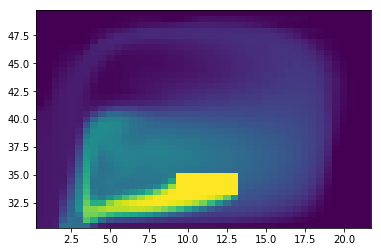

In [101]:
# Note that we undo the reshape operation to get the data back on the original horizontal grid
tmp = state_tensor[:,0].reshape( (nlat,nlon) )
plt.pcolormesh(data.xh,data.yh,tmp)

In [9]:
import pandas as pd

In [12]:
df = pd.DataFrame(state_tensor)
df

,0,1,2,3,4,5,6,7
0,5.861651e-02,0.000000e+00,3.390200e-01,0.000000e+00,6.317884e-01,0.000000e+00,-1.100630e+06,-2.338995e-17
1,5.937235e-02,0.000000e+00,3.405681e-01,0.000000e+00,6.341723e-01,0.000000e+00,-1.876854e+06,-3.221766e-17
2,8.536111e-02,0.000000e+00,3.325808e-01,0.000000e+00,5.859765e-01,0.000000e+00,2.068432e+05,-1.602895e-17
3,3.587742e-01,1.081648e-40,2.558325e-01,0.000000e+00,6.346709e-02,0.000000e+00,4.768051e+06,1.197511e-17
4,3.596820e-01,5.565628e-26,2.568136e-01,0.000000e+00,6.387575e-02,0.000000e+00,8.791964e+06,7.163739e-10
5,3.599889e-01,3.534986e-20,2.575369e-01,0.000000e+00,6.408940e-02,0.000000e+00,9.063044e+06,8.544089e-09
6,3.594036e-01,1.343517e-11,2.599972e-01,0.000000e+00,6.439223e-02,0.000000e+00,6.430952e+06,-1.167396e+03
7,1.681275e-01,4.313706e-09,3.248719e-01,0.000000e+00,6.544145e-02,0.000000e+00,3.884393e+06,-2.017282e+04
8,7.095821e-02,2.484754e-02,3.469623e-01,0.000000e+00,6.158174e-02,0.000000e+00,2.839402e+06,-3.776015e+04
9,5.087382e-02,1.853946e-01,3.457435e-01,6.450177e-42,5.661946e-02,0.000000e+00,2.622561e+06,-1.599395e+04
